<a href="https://colab.research.google.com/github/yohanesnuwara/open-geoscience-repository/blob/master/how_to_access_public_geoscience_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Access the Public geoscience Data from Google Drive to Google Colab

> (Yohanes Nuwara, [ign.nuwara97@gmail.com](ign.nuwara97@gmail.com))

In this tutorial we will learn how to:

* Access to our Google Drive account via Google Colab
* Use basic Linux shell scripting e.g. `cd` and `ls` to inspect the directories
* Unzip files directly from the Google Drive to our working directory here, from various formats e.g. `.zip`, `.tar`, and `.tgz`
* Open `.png` figures in Python

Now, we assume that we have read the [README](https://github.com/yohanesnuwara/open-geoscience-repository#how-to-access-these-data) on how to access the data in the `open-geoscience-repository`. We have now the `Public geoscience Data` database in our `My Drive`. Now, let's access to our Google Drive account. 

Run the following code. We will get an **output** with a link after that, click on the link, and proceed the instruction. Then, we will get an **authorization code** to be pasted in the output. The press `Enter` to proceed the authorization.

If successfull, we will get this output:
`Mounted at /content/drive`

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Now, we will have our Google Drive directories in our Google Colab. To enter the `Public geoscience Data` directory, we use `cd`. 

In [6]:
cd /content/drive/'My Drive'/'Public geoscience Data'

/content/drive/My Drive/Public geoscience Data


Code `ls -l` to see what's inside the `Public geoscience Data` directory.

In [8]:
ls -l

total 181225
dr-x------ 2 root root      4096 Jan  7  2019 '48 well composite logs in machine readable format'/
dr-x------ 2 root root      4096 Dec  4 11:00 'Canning 3D TDQ'/
dr-x------ 2 root root      4096 May 16  2019 'collection of geological images for classification'/
dr-x------ 2 root root      4096 Sep 26  2017 'Dutch F3 seismic data'/
dr-x------ 2 root root      4096 Nov 10  2017 'F3 seismic data plus classification data for machine learning '/
dr-x------ 2 root root      4096 May 28  2019 'GEOLINK North sea wells with Lithology interpretation'/
dr-x------ 2 root root      4096 Sep 14  2018 'geolocate documents with shapefiles'/
-r-------- 1 root root   4198953 Oct  9  2017 'malenov user guide.pdf'
-r-------- 1 root root 181325755 Sep 14  2018 'Norwegian  paper completion logs with lithology lables.zip'
dr-x------ 2 root root      4096 Sep 11  2018 'Norwegian well  completion reports and label data for hydrocarbon shows'/
dr-x------ 2 root root      4096 May 30  2018 'Poseido

There are overall 12 folders inside this `Public geoscience Data` directory. There is 1 file with extension `.zip`.

We will inspect the files inside these 12 folders. If we would like to inspect the files inside these directories, of course, it will be very tedious to use `cd` and `ls`. 

Eye on the left screen, there are 3 symbols. Choose the `Files` symbol, we will find `drive`, which is our Google Drive, then expand it. Search for the directory `Public geoscience Data` and expand them to inspect what's inside.

Below is a summary of the contents.

|Folder|Content|File extensions|
|:---:|:---:|:---:|
|48 well composite logs in machine readable format|one ZIP file|.zip|
|Canning 3D TDQ|3D Seismic|.sgy|
|collection of geological images for classification|Geoscience figures|.png, .jpg|
|Dutch F3 seismic data|3D seismic|.segy|
|F3 seismic data plus classification data for machine learning|3D seismic, Python script|.segy, .py|
|GEOLINK North sea wells with Lithology interpretation|Lithology and wells, Excel spreadsheet|.zip, .xlsx, .png|
|geolocate documents with shapefiles|one ZIP file|.zip|
|Poseidon Seismic and well data NW Shelf Australia|Core images, Excel spreadsheet, 3D seismic, report|.segy, .las, .xlsx, .pdf| 
|public Core images and core interpretation|Core descriptions|.zip, .las, .pdf, .tiff, .jpg| 
|RealRocks RealPore RealLogs Public Geoprovider sponsored|ZIP files, Excel spreadsheet|.zip, .xlsx|
|reports for images|Documents, reports|.pdf|

Overall, we have various extensions. We will access these. The following is tutorial to access each of these files. 

## Unzip `.ZIP` Files

We will need to import Python library `zipfile`

In [0]:
import zipfile

From the summary table above, there are at least 5 folders containing `.zip` files. To see in details, we could inspect the exact directory location that contains the `.zip` files by executing this code.

In [12]:
!find . -type f -name "*.zip"

./Poseidon Seismic and well data NW Shelf Australia/All wells data logs and reports/Spliced well logs provided by occam technology /public wells poseidon 3D Petrel project.zip
./Poseidon Seismic and well data NW Shelf Australia/Ascii velocity field data migration vels/Poseidon ascii velocities.zip
./Norwegian well  completion reports and label data for hydrocarbon shows/Norwegian composite logs released cc_by.zip
./public Core images and core interpretation/core stick images  and las files for digitzed cores/well_core images 6406_3_2.zip
./public Core images and core interpretation/core stick images  and las files for digitzed cores/well_core images_6506_12_5.zip
./public Core images and core interpretation/core stick images  and las files for digitzed cores/well core images_ 6506_12_6.zip
./public Core images and core interpretation/core stick images  and las files for digitzed cores/well_ core images 6507_7_4.zip
./geolocate documents with shapefiles/location_shape_files_npd.zip
./No

We will take only three examples. First, we want to unzip in the folder `48 well composite logs in machine readable format`. 

Do the following:

`!unzip '... file path ...' -d '... to new folder name ...'` 

Meaning, we extract the `.zip` file from the file path, and it will be stored in a certain path directory of our interest, for example here is `/content/well composites`. The path folder will be automatically created and the extracted files will be stored there.

In [18]:
!unzip '/content/drive/My Drive/Public geoscience Data/48 well composite logs in machine readable format/48_well composite logs machine readable.zip' -d '/content/well composites'

Archive:  /content/drive/My Drive/Public geoscience Data/48 well composite logs in machine readable format/48_well composite logs machine readable.zip
   creating: /content/well composites/well composites/well_15_12_4/
  inflating: /content/well composites/well composites/well_15_12_4/15_12_4_1_-150_150_complog_header.png  
  inflating: /content/well composites/well composites/well_15_12_4/15_12_4_2_150_800.png  
  inflating: /content/well composites/well composites/well_15_12_4/15_12_4_3_800_1300.png  
  inflating: /content/well composites/well composites/well_15_12_4/15_12_4_4_1300_1900.png  
  inflating: /content/well composites/well composites/well_15_12_4/15_12_4_5_1900_2600.png  
  inflating: /content/well composites/well composites/well_15_12_4/15_12_4_6_2600_3150.png  
  inflating: /content/well composites/well composites/well_15_12_4/15_12_4_7_3150_3450_complog_footer.png  
   creating: /content/well composites/well composites/well_15_2_1/
  inflating: /content/well composites

Unzipping is successfull!

Now we can inspect our extracted files in our new path directory `/content/well composites`. Still remember? We could use `ls` or go directly to the `Files` pane on the left of the screen.

In [20]:
ls '/content/well composites'

 well_15_12_4/    well_15_6_8_S/   well_30_6_11/     well_7_11_6/
 well_15_2_1/     well_15_9_1/     well_30_6_13/     well_7_11_7/
 well_15_3_1/     well_30_2_1/     well_30_6_14/     well_7_11_8/
 well_15_3_3/     well_30_2_2/     well_30_6_15/     well_7_11_9/
 well_15_3_4/     well_30_2_3/     well_30_6_16/     well_7_12_11/
 well_15_3_5/     well_30_3_3/     well_30_6_17_A/   well_7_12_3_A/
 well_15_5_1/     well_30_3_4_B/   well_30_6_17_R/   well_7_12_5/
 well_15_5_2/     well_30_3_5_S/   well_30_6_2/      well_7_12_7/
 well_15_5_4/     well_30_3_6_S/   well_30_6_4/      well_7_12_8/
 well_15_5_5/     well_30_3_7_A/   well_30_6_5/     'well composites'/
 well_15_5_6/     well_30_3_7_S/   well_30_6_7/
 well_15_6_7/     well_30_5_2/     well_7_11_10_S/
 well_15_6_8_A/   well_30_6_10/    well_7_11_5/


Now, if we see what's inside the folder `well_15_12_4`, there are `.png` figures. 

We will now learn how to open `.png` figures. 

## Open `.PNG` Image Files

First we import `PIL` library. From the `PIL` library, we use `Image` module.

In [0]:
from PIL import Image

We will open one file named `15_12_4_1_-150_150_complog_header.png` in the folder `well_15_12_4`. 

Run `Image.open("... file path ...")`

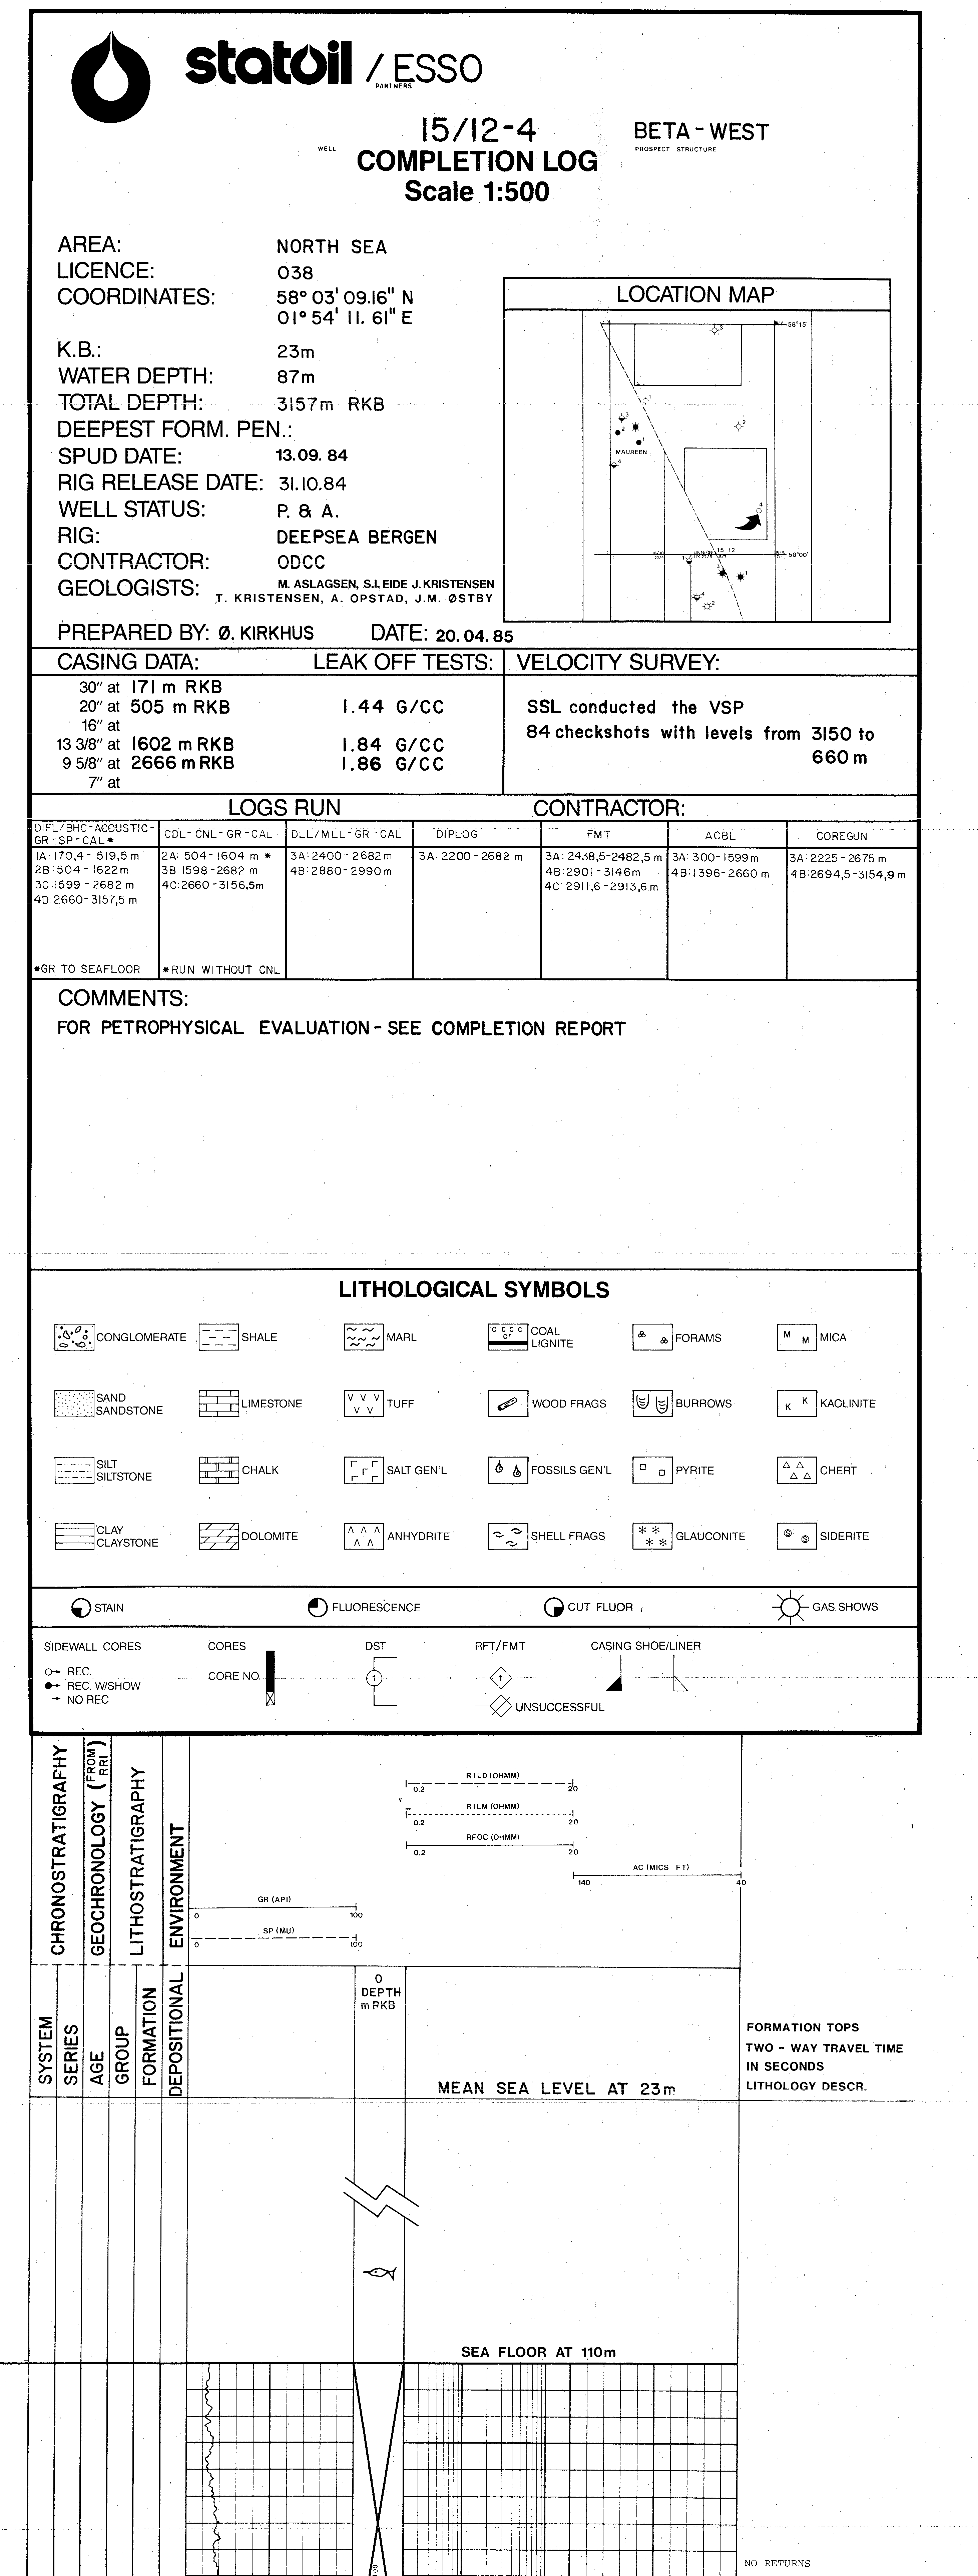

In [0]:
img = Image.open("/content/tmp/well composites/well_15_12_4/15_12_4_1_-150_150_complog_header.png")
img

This is a completion log acquired by Statoil ASA on 13 September 1984 (spud date) in the Deepsea Bergen rig. 

Next!

We will try another example of **unzipping a file** that contains also a `.png` file. The folder name is: `GEOLINK North sea wells with Lithology interpretation`. We will place the extracted files in our new directory `GEOLINK North Sea`

In [22]:
!unzip '/content/drive/My Drive/Public geoscience Data/GEOLINK North sea wells with Lithology interpretation/GEOLINK_Lithology and wells NORTH SEA.zip' -d '/content/GEOLINK North Sea'

Archive:  /content/drive/My Drive/Public geoscience Data/GEOLINK North sea wells with Lithology interpretation/GEOLINK_Lithology and wells NORTH SEA.zip
  inflating: /content/GEOLINK North Sea/15_9-12.las  
  inflating: /content/GEOLINK North Sea/15_9-13.las  
  inflating: /content/GEOLINK North Sea/15_9-14.las  
  inflating: /content/GEOLINK North Sea/15_9-15.las  
  inflating: /content/GEOLINK North Sea/15_9-17.las  
  inflating: /content/GEOLINK North Sea/15_9-18.las  
  inflating: /content/GEOLINK North Sea/15_9-19 A.las  
  inflating: /content/GEOLINK North Sea/15_9-19 B.las  
  inflating: /content/GEOLINK North Sea/15_9-2.las  
  inflating: /content/GEOLINK North Sea/15_9-22.las  
  inflating: /content/GEOLINK North Sea/15_9-23.las  
  inflating: /content/GEOLINK North Sea/15_9-4.las  
  inflating: /content/GEOLINK North Sea/15_9-5.las  
  inflating: /content/GEOLINK North Sea/15_9-7.las  
  inflating: /content/GEOLINK North Sea/15_9-8.las  
  inflating: /content/GEOLINK North Se

Inspect the file contents

In [23]:
ls '/content/GEOLINK North Sea'

 15_9-12.las      '25_8-5 S.las'    '34_11-3 T2.las'
 15_9-13.las       25_8-7.las        34_12-1.las
 15_9-14.las       25_8-9.las       '34_2-2 R.las'
 15_9-15.las       25_9-1.las        34_2-4.las
 15_9-17.las       26_4-1.las       '34_3-1 A.las'
 15_9-18.las       29_3-1.las       '34_3-1 S.las'
'15_9-19 A.las'    29_6-1.las       '34_3-2 S.las'
'15_9-19 B.las'    30_11-3.las      '34_3-3 A.las'
 15_9-22.las       30_2-1.las       '34_3-3 S.las'
 15_9-23.las       30_2-2.las       '34_4-10 R.las'
 15_9-2.las       '30_3-2 R.las'     34_4-2.las
 15_9-4.las        30_3-3.las        34_4-3.las
 15_9-5.las       '30_3-4 R.las'     34_4-5.las
 15_9-7.las       '30_3-5 S.las'    '34_5-1 A.las'
 15_9-8.las        30_4-1.las       '34_5-1 S.las'
 15_9-9.las        30_4-2.las       '34_6-1 S.las'
 16_10-1.las       30_6-11.las       34_7-12.las
 16_10-2.las       30_6-14.las       34_7-13.las
 16_10-3.las       30_6-19.las      '34_7-15 S.las'
 16_10-4.las       30_6-22.las       34_7-16.

As we can see, it contains also `.LAS` files, which are the **well logs** files. In the next Section we will cover up how to open these files.

But now, we focus on opening an image file, which we can find out: `location of wells.png`. Open again with `Image.open()`

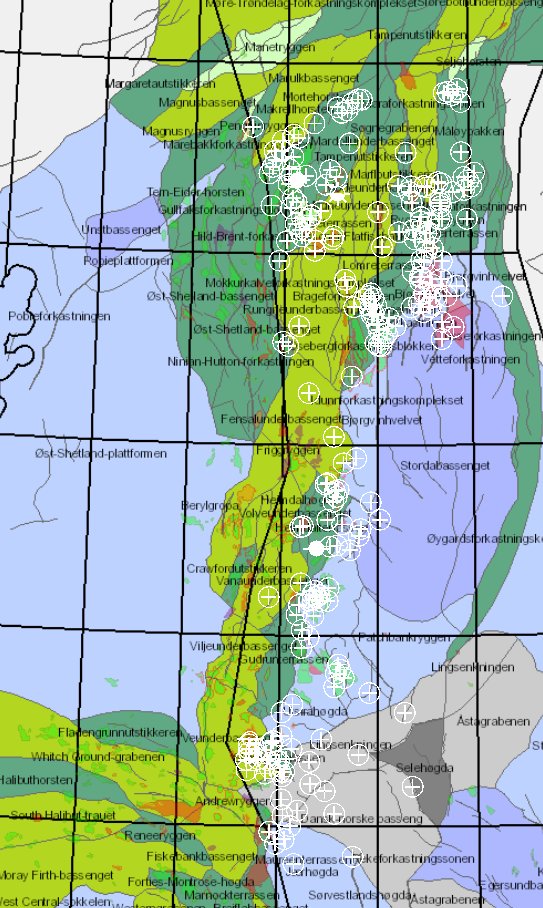

In [24]:
img = Image.open("/content/GEOLINK North Sea/location of wells.png")
img

It's a North Sea map with coordinates of the wells. 

We already know now how to unzip `.ZIP` files and how to open `.PNG` image files, now let's move on to the next tutorial on how to open `.LAS` well-log data files.

## Open `.LAS` Well-log files

Now starts the **REAL GEOSCIENCE!**